## **Impacto de la contaminación en el aprendizaje de los estudiantes chilenos**
*Eduardo Andrés Marambio Tapia 21.282.321-K   
Constanza del Pilar Márquez Vera 20.493.093-7*

Para llevar a cabo este estudio se trabajó con las bases de datos de los años 2013, 2014, 2015, 2017 y 2019 que se encuentran disponibles en la página oficial de la Agencia de Calidad de la Educación que contienen la información de alrededor de 5800 colegios a lo largo de Chile. Todas estas bases poseían los mismos atributos, por lo que se generó un join con el atributo del “Nombre Colegio”.

Resultando así una única base de datos, la que se redimensionó, se separó la serie de tiempo, agregando estadística, promedio, desviación estandar y mediana. Además de la incorporación de una columna extra con valoración binaria donde toma el valor 1 si el colegio
pertenece a una zona de sacrificio y 0 si no pertenece.

Junto a ello, se trabajó con las información de las zonas de sacrificio del país. Una zona de sacrificio se considera como una zona en donde las normas de calidad del medio ambiente se encuentran sobrepasadas. De acuerdo con los antecedentes recabados por el Ministerio del Medio Ambiente, se determinó que las comunas de Tocopilla, Mejillones, Huasco, Quintero, Puchuncaví y Coronel, comparten el hecho de ser zonas altamente industrializadas.

Uno de los indicadores más comunes para medir la calidad del aire es a través de las partículas en suspensión (PM). Esto evalúa el nivel de contaminación atmosférica y su potencial impacto en la salud y el medio ambiente.

A través del atributo que contiene las comunas, será posible generar comparaciones de rendimiento entre los establecimientos de las diferentes zonas.

Para poder ejecutar los distintos códigos, se requerirá importar las librerías necesarias.
Primero se importará las librerías 'numpy' y 'pandas' que nos ayudan a la manipulación de la data, luego para la visualización de resultados importamos la libreria 'seaborn', especificamente 'matplotlib.pyplot' para generar caja de bigotes. Luego con 'from scipy.spatial.distance import cdist, pdist' importamos las funciones útiles para calcular distancias entre puntos o conjuntos de puntos. Esto nos ayudará más adelante a calcular la cantidad de cluster a utilizar.
'from sklearn.cluster import KMeans' esta clase se utiliza para realizar el algoritmo de agrupamiento K-Means basados en la similitud entre ellos. 'from sklearn.metrics import silhouette_score' se utiliza para evaluar la calidad de la agrupacion obtenida mediante Kmeans, es decir qué tan similar es un punto de datos a su propio cluster en compración con otro. '!pip install scikit-learn-extra', instala el paquete que contiene los algoritmos de agrupamiento adicional. 'from sklearn.cluster import DBSCAN' es un algoritmo de agrupamiento que agrupa puntos de datos que están cerca entre sí en función de su densidad, y puede identificar puntos atípicos (ruido) que no pertenecen a ningún clúster. 'from sklearn.mixture import GausssianMixture' tipo de modelo probabilístico, que asume que los datos se generan a partir de una mezcla gaussiana.
'from sklearn.cluster import AgglomerativeClustering' se utiliza para realizar el agrupamiento jerárquico, un método que construye una jerarquía de clústeres fusionando o dividiendo grupos iterativamente.
Finalmente para cargar el archivo utilizamos 'from google.colab import files'.


In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# To compute distances
from scipy.spatial.distance import cdist, pdist

# To perform K-Means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Install the sklearn_extra package
!pip install scikit-learn-extra

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

from google.colab import files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.1 MB/s eta 0:00:00


In [ ]:
uploaded = files.upload()
data = pd.read_excel('BD_SIMCE.xlsx')

Saving BD_SIMCE.xlsx to BD_SIMCE.xlsx


Visualización de los 5 primeros datos de la base de datos.

In [ ]:
data.head()

,nom_rbd,nom_com_rbd,prom_lect8b_t_rbd,prom_mate8b_t_rbd,desv_lect8b_t_rbd,desv_mate8b_t_rbd,med_lect8b_t_rbd,med_mate8b_t_rbd,Z_Sacrificio
0,LICEOPOLITECNICODEAYSEN,AISÉN,211.0,218.6,9.591663,11.760102,208,225,0
1,ESCUELABASICA,AISÉN,248.8,256.0,18.593009,17.564168,255,258,0
2,ESCUELAPEDROAGUIRRECERDA,AISÉN,220.0,220.8,20.772578,31.292172,216,211,0
3,ESCUELACARLOSCONDELL,AISÉN,230.8,233.2,38.401823,22.286767,219,223,0
4,ESCUELAALMIRANTESIMPSON,AISÉN,240.8,239.2,20.680909,18.740331,243,242,0


Cantidad de columnas y filas de la data

In [ ]:
data.shape

(4772, 9)

Para identificar si las columnas contenían nulos, se requirió visualizar por fila la cantidad de no nulos.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nom_rbd            4772 non-null   object 
 1   nom_com_rbd        4772 non-null   object 
 2   prom_lect8b_t_rbd  4772 non-null   float64
 3   prom_mate8b_t_rbd  4772 non-null   float64
 4   desv_lect8b_t_rbd  4772 non-null   float64
 5   desv_mate8b_t_rbd  4772 non-null   float64
 6   med_lect8b_t_rbd   4772 non-null   int64  
 7   med_mate8b_t_rbd   4772 non-null   int64  
 8   Z_Sacrificio       4772 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 335.7+ KB


Verificamos cantidad de datos duplicados

In [ ]:
# Checking for duplicate values
data.duplicated().sum()

0

Verificamos la cantidad de datos nulos

In [ ]:
# Checking for missing values
data.isnull().sum()

,0
nom_rbd,0
nom_com_rbd,0
prom_lect8b_t_rbd,0
prom_mate8b_t_rbd,0
desv_lect8b_t_rbd,0
desv_mate8b_t_rbd,0
med_lect8b_t_rbd,0
med_mate8b_t_rbd,0
Z_Sacrificio,0


Copiamos la data en una nueva variable, así en caso de modificaciones, nos quedaba una data original de respaldo

In [ ]:
df = data.copy()

Para realizar PCA, primero se deben escalar los datos, así es posible generar comparaciones.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scaling the data before clustering
scaler = StandardScaler()
subset = data.iloc[:, 2:8].copy()
subset_scaled = scaler.fit_transform(subset)
# Creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)

subset_scaled_df.head()

,prom_lect8b_t_rbd,prom_mate8b_t_rbd,desv_lect8b_t_rbd,desv_mate8b_t_rbd,med_lect8b_t_rbd,med_mate8b_t_rbd
0,-1.484463,-1.242652,-1.194223,-0.678402,-1.625970,-0.953675
1,0.215993,0.340812,0.143957,0.128643,0.496960,0.366144
2,-1.079593,-1.149507,0.467981,2.037496,-1.264620,-1.513599
3,-0.593748,-0.624509,3.088821,0.785311,-1.129114,-1.033664
4,-0.143892,-0.370477,0.454353,0.292186,-0.045065,-0.273768


Se generó PCA, para conocer la cantidad de componentes que explican el porcentaje de datos. Con ello se identificó que en base a 2 componentes es posible explicar sobre el 85% de los datos.

In [ ]:
#Importing PCA
from sklearn.decomposition import PCA

#Defining the number of principal components to generate
n=subset_scaled_df.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1)
data_pca = pd.DataFrame(pca.fit_transform(subset_scaled_df))

Text(0, 0.5, 'Cumulative Explained Variance')

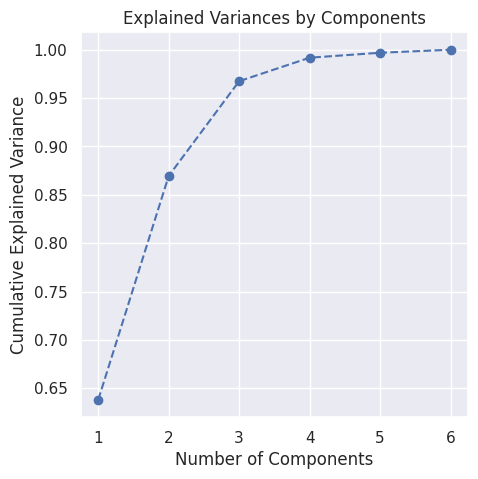

In [ ]:
# visualize the Explained Individual Components
plt.figure(figsize = (5,5))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

Se realizó una copia de la data trabajada con PCA, para el posterior uso del algoritmo Kmeans. Este codigo genera 15 algoritmos, cada uno con k cantidad de cluster en un rango de 1-15.

The Elbow Method, presentado a continuación, es un método gráfico para encontrar el valor K óptimo para k-means, uno de los métodos de clustering.

In [ ]:
k_means_df = data_pca.copy()

Number of Clusters: 1 	Average Distortion: 2.2014108826281786
Number of Clusters: 2 	Average Distortion: 1.7008681900771256
Number of Clusters: 3 	Average Distortion: 1.5134088771982417
Number of Clusters: 4 	Average Distortion: 1.380626178329109
Number of Clusters: 5 	Average Distortion: 1.2952672661448528
Number of Clusters: 6 	Average Distortion: 1.2440571190158523
Number of Clusters: 7 	Average Distortion: 1.200820587696286
Number of Clusters: 8 	Average Distortion: 1.1588416310755076
Number of Clusters: 9 	Average Distortion: 1.1306243904898423
Number of Clusters: 10 	Average Distortion: 1.0972395797904977
Number of Clusters: 11 	Average Distortion: 1.065489263342108
Number of Clusters: 12 	Average Distortion: 1.0377538796514962
Number of Clusters: 13 	Average Distortion: 1.021116106275286
Number of Clusters: 14 	Average Distortion: 1.0055928776381398


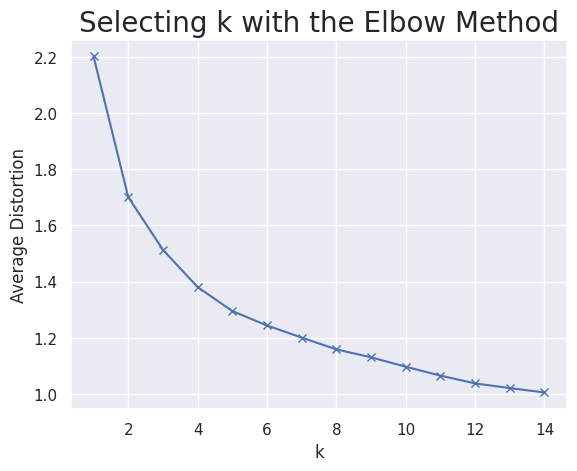

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k, random_state = 1)
    model.fit(data_pca)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis = 1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize = 20)
plt.show()


El k óptimo lo conocemos al identificar dónde se encuentra el codo, es decir, el mayor cambio de pendiente.

Como no podemos determinar a simple vista cual es el codo, podemos ir analizando con distintos valores k, partiendo desde un k igual a 4.


**PRIMERO**

**4 CLUSTERS**

In [ ]:
kmeans1 = KMeans(n_clusters = 4, random_state = 1)
kmeans1.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [ ]:
# Creating a copy of the original data
df1_cluster = data.copy()

# Adding K-Means cluster labels to the K-Means and original dataframes
k_means_df["KM_segments"] = kmeans1.labels_
df1_cluster["KM_segments"] = kmeans1.labels_

Visualización de los primeros 5 datos con su respectivo cluster al que pertenece según sus características.

In [ ]:
df1_cluster.head()

,nom_rbd,nom_com_rbd,prom_lect8b_t_rbd,prom_mate8b_t_rbd,desv_lect8b_t_rbd,desv_mate8b_t_rbd,med_lect8b_t_rbd,med_mate8b_t_rbd,Z_Sacrificio,KM_segments
0,LICEOPOLITECNICODEAYSEN,AISÉN,211.0,218.6,9.591663,11.760102,208,225,0,1
1,ESCUELABASICA,AISÉN,248.8,256.0,18.593009,17.564168,255,258,0,2
2,ESCUELAPEDROAGUIRRECERDA,AISÉN,220.0,220.8,20.772578,31.292172,216,211,0,3
3,ESCUELACARLOSCONDELL,AISÉN,230.8,233.2,38.401823,22.286767,219,223,0,3
4,ESCUELAALMIRANTESIMPSON,AISÉN,240.8,239.2,20.680909,18.740331,243,242,0,3


Debemos asegurarnos que nuestra columna que contiene 1 para las comunas que pertenecen a zonas de sacrificio y 0 para las que no, pueda ser leida como un string, ya que no corresponde a un atributo cantitativo.

In [ ]:
df1_cluster['Z_Sacrificio'] = df1_cluster['Z_Sacrificio'].astype(str)

Ahora utilizamos solo las columnas que contengan datos numéricos, y partir de estas calculamos el promedio, asi creamos un perfil de cada segmento.

In [ ]:
# Select only numeric columns for calculating the mean
numeric_cols = df1_cluster.select_dtypes(include=np.number).columns
km_cluster_profile = df1_cluster.groupby("KM_segments")[numeric_cols].mean()

Contabilizamos la cantidad de elementos por cluster agrupados de acuerdo a la columna de referencia 'promedio de lectura' dentro de cada grupo, también podria haber sido con la columna de 'promedio de matemática'.

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1_cluster.groupby("KM_segments")["prom_lect8b_t_rbd"].count().values
)

Visualizacion de los valores máximos en cada columna que contiene el registro de los promedios (los que se encuentran en color verde), para facilitar la identificación de los patrones/tendencia por cluster. En este caso se identifica que el cluster 0 es el que posee el máximo promedio, y luego le siguen los cluster 2, 3 y 1. En donde por cada cluster existen diferentes cantidades de acuerdo a esta característica. En el cluster 0 existen 786 establecimientos, para el cluster 1 existen 1714 establecimientos, para el cluster 2 existen 1545 establecimientos y finalmente para el 3 existen 727 establecimientos.

In [ ]:
km_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,prom_lect8b_t_rbd,prom_mate8b_t_rbd,desv_lect8b_t_rbd,desv_mate8b_t_rbd,med_lect8b_t_rbd,med_mate8b_t_rbd,KM_segments,count_in_each_segment
KM_segments,,,,,,,,
0,280.253690,288.039695,17.582723,19.716167,278.900763,291.128499,0.000000,786
1,223.884131,227.263361,16.033465,14.010696,223.677946,227.742124,1.000000,1714
2,250.279353,253.667702,14.926603,13.962824,250.427184,254.315858,2.000000,1545
3,238.876204,241.229436,27.155399,25.196031,240.504814,241.257221,3.000000,727


Visualización de los nombres de los establecimientos que están contenidos en cada cluster.

In [ ]:

for cl in df1_cluster["KM_segments"].unique():
    print("In cluster {}, the following college are present:".format(cl))
    print(df1_cluster[df1_cluster["KM_segments"] == cl]["nom_rbd"].unique())
    print()

In cluster 1, the following college are present:
['LICEOPOLITECNICODEAYSEN' 'COLEGIOCARLOSALESSANDRIALTAMIRANO'
 'ESCUELABASICARURALELYECO' ... 'ESCUELAHÉROESDECHILE'
 'ESCUELAPADREPEDROCAMPOSMENCHACA' 'LICEOCAMPANARIO']

In cluster 2, the following college are present:
['ESCUELABASICA' 'COLEGIOSAGRADAFAMILIA'
 'COLEGIOTERESADELOSANDES-ALGARROBO' ... 'ESCUELALOSMAYOS'
 'ESCUELAFERNANDOBAQUEDANO' 'LICEODEZAPALLAR']

In cluster 3, the following college are present:
['ESCUELAPEDROAGUIRRECERDA' 'ESCUELACARLOSCONDELL'
 'ESCUELAALMIRANTESIMPSON' 'LICEORAULBROUSSAINCAMPINO'
 'ESCUELAPARTICULARSANJOSE' 'ESCUELAELASIENTO' 'ESCUELASANALFONSO'
 'ESCUELARURALVILLACHACAO' 'ESCUELAFATIMA' 'LICEOBICENTENARIODEANCUD'
 'CENTROEDUCACIONALSANANDRES' 'ESCUELAPARTICULARCURAMO'
 'ESCUELAPARTICULARCOLONIADEGAÑ' 'ESC.BASICAMANUELRODRIGUEZ'
 'ESCUELAPART.NUESTRASENORADELROSARIO' 'ESCUELALASAMERICAS'
 'ESCUELAPARTICULARSANTATERESITA' 'COLEGIOSANAGUSTIN' 'COLEGIOPROVIDENCIA'
 'COLEGIOSANPATRICIO' 'COLEGIOINGLES-

Visualización de la cantidad de establecimientos pertenecientes a las zonas de sacrificio por cluster, en donde para el cluster 0, el que posee la característica de contener a los establecimientos con mejores rendimientos, existe la menor cantidad de colegios pertenecientes a zonas de sacrificio, mientras que para el cluster 1, el cual se caracteriza por contener los promedios más bajos, se encuentra 25 de los 53 establecimientos pertenecientes a las zonas de sacrificio.

In [ ]:
df1_cluster.groupby(["KM_segments", "Z_Sacrificio"])['nom_rbd'].count()

KM_segments  Z_Sacrificio
0            0                783
             1                  3
1            0               1689
             1                 25
2            0               1526
             1                 19
3            0                721
             1                  6
Name: nom_rbd, dtype: int64

Boxplot por cluster de acuerdo a los diferentes atributos que contiene nuestra base de datos, lo importante es destacar lo que ocurre en base a los promedios.
A partir de los boxplot generados del cluster 0 y 1 de acuerdo al 'promedio de lectura', se visualiza el contraste de tendencia, ya que el cluster 0 presenta outlier que toman valores más altos que cualquier otro, además el 75% de los datos de éste está por sobre la mediana de los cluster 1, 2 y 3, mientras que el cluster 1 presenta los outlier más bajos y el 75% de sus datos se encuentrá por debajo de los cluster 0, 2 y 3. Este escenario se repite para el 'promedio de matemática'.


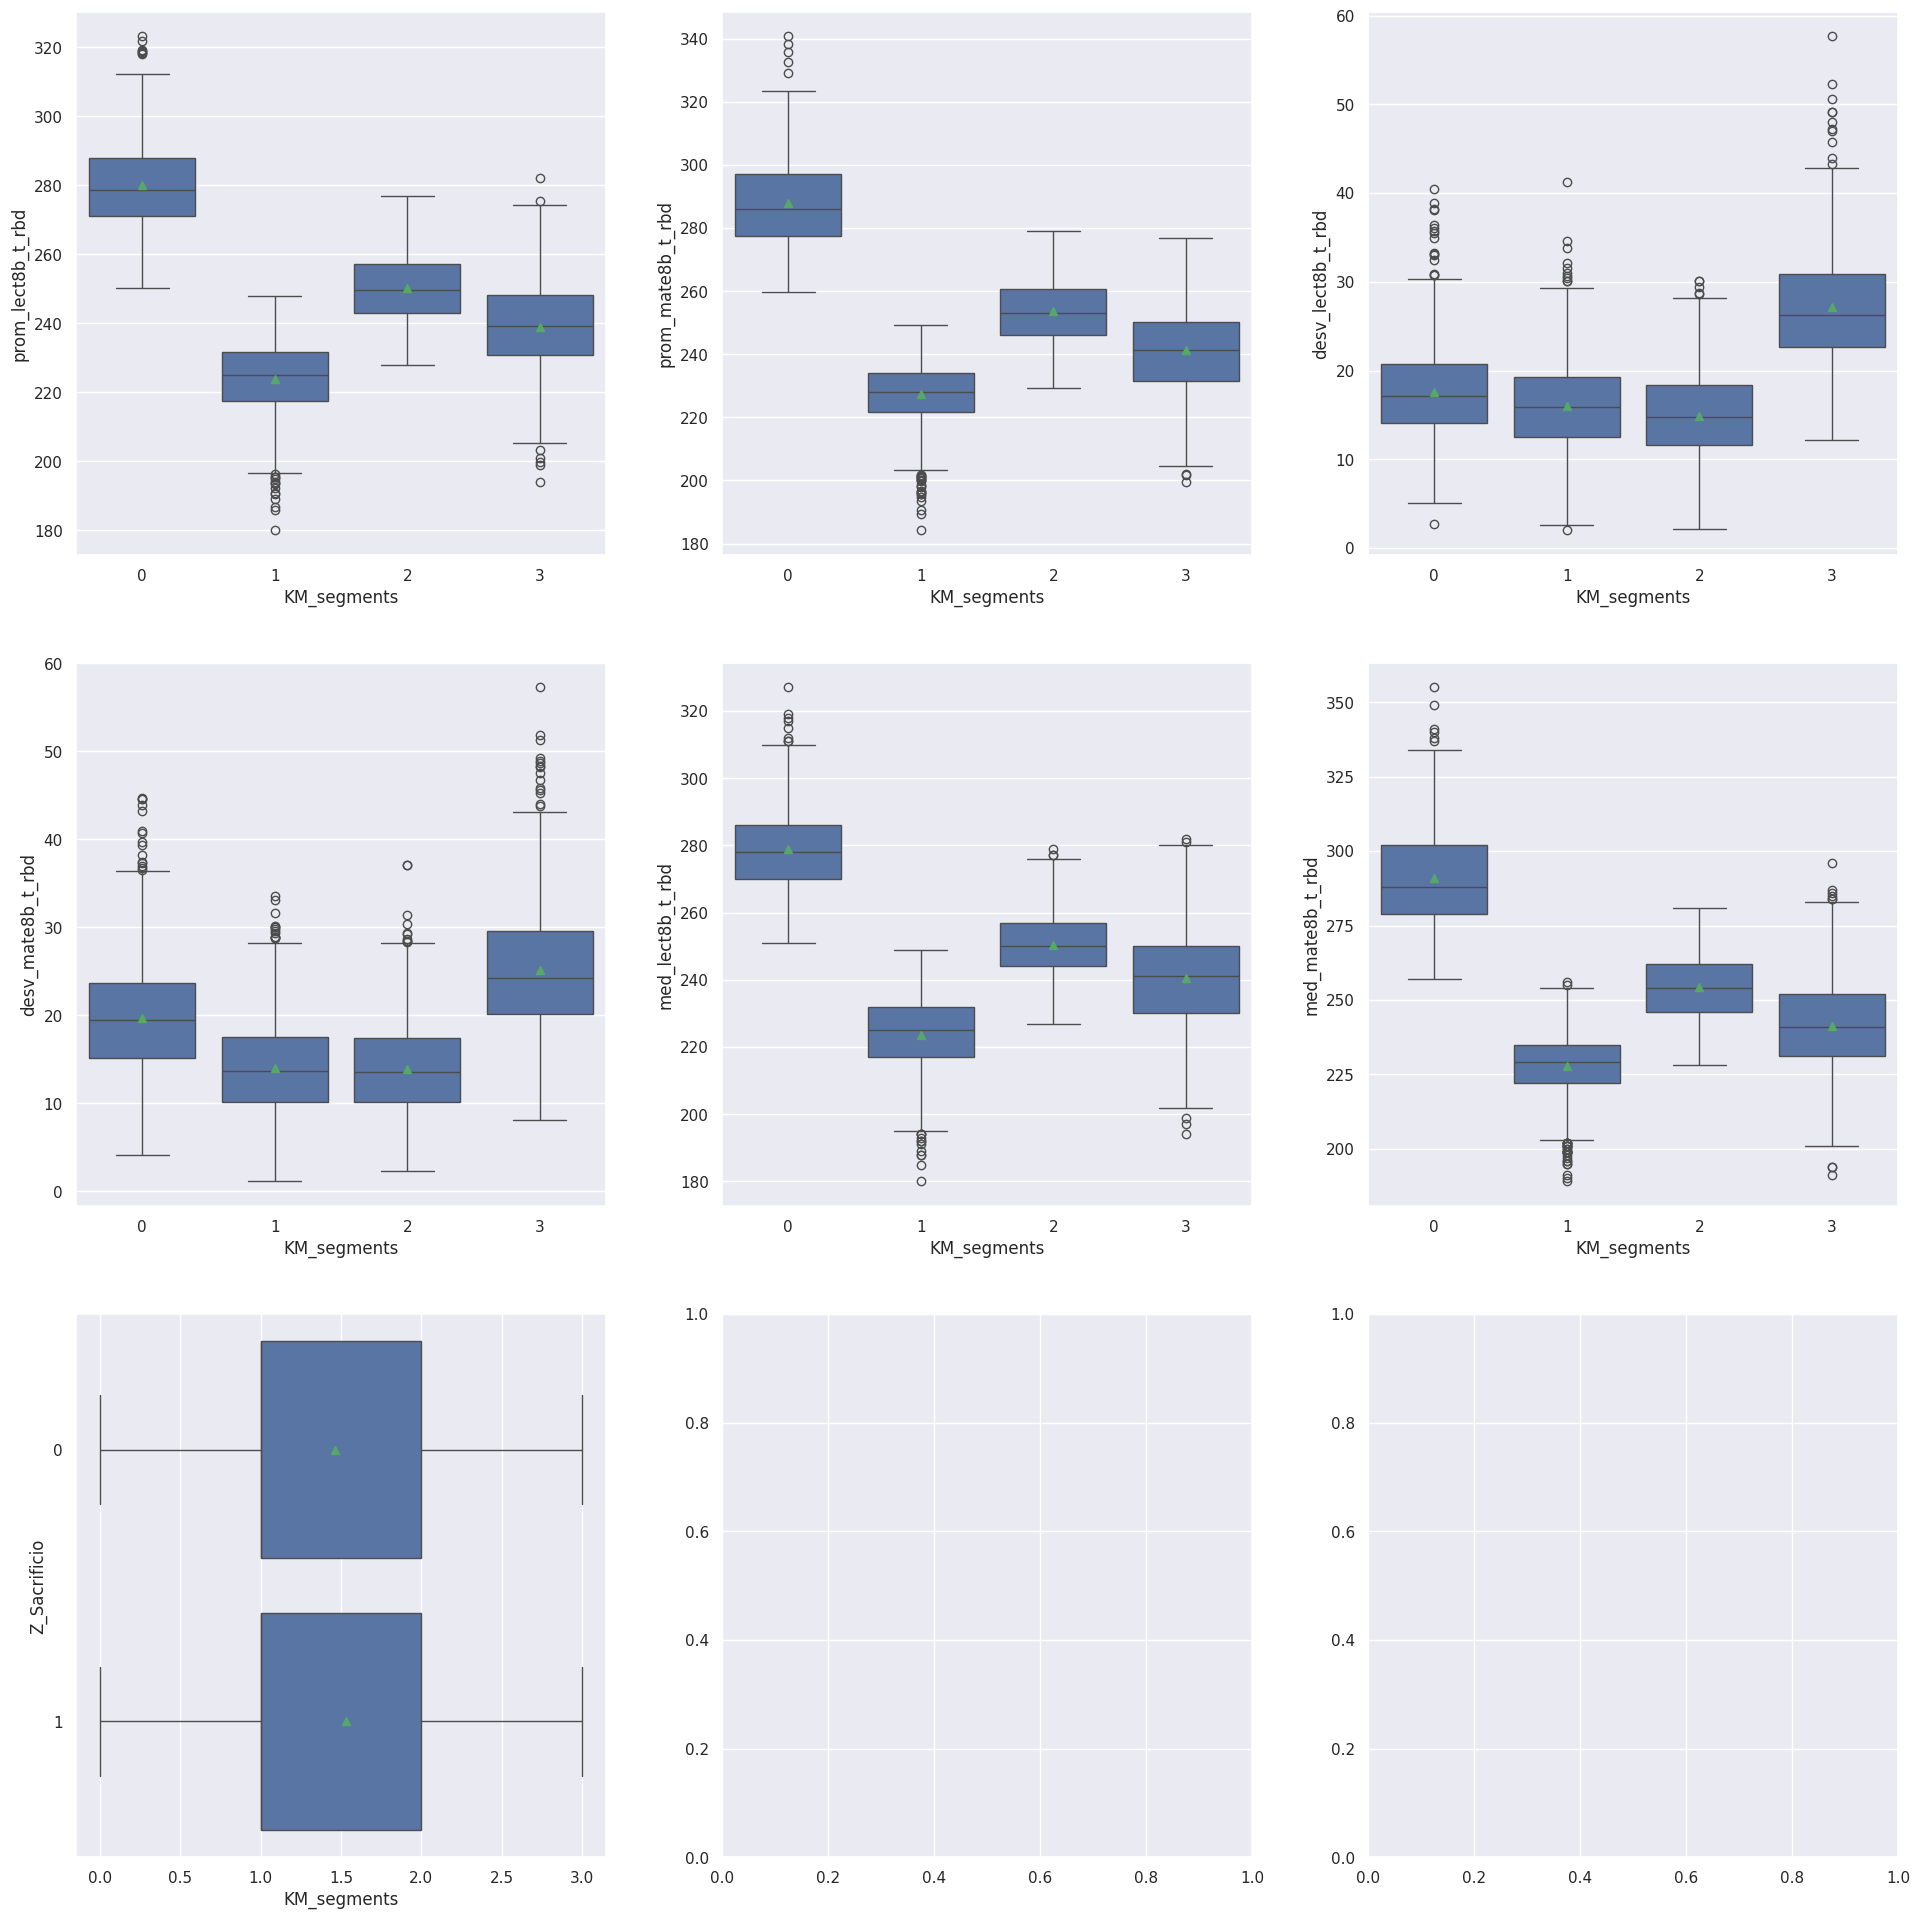

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(3):
        if counter < 7:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df1_cluster,
                y = df1_cluster.columns[2 + counter],
                x = "KM_segments", showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

A continuación repetiremos el procedimiento anterior para otro valor de k, con valor k=5, de modo de hallar la mayor representatividad de los cluster, así verificar tendencias propias de cada uno.

**CON 5 CLUSTERS**

In [ ]:
k_means_df2 = data_pca.copy()

Number of Clusters: 1 	Average Distortion: 2.2014108826281786
Number of Clusters: 2 	Average Distortion: 1.7008681900771256
Number of Clusters: 3 	Average Distortion: 1.5134088771982417
Number of Clusters: 4 	Average Distortion: 1.380626178329109
Number of Clusters: 5 	Average Distortion: 1.2952672661448528
Number of Clusters: 6 	Average Distortion: 1.2440571190158523
Number of Clusters: 7 	Average Distortion: 1.200820587696286
Number of Clusters: 8 	Average Distortion: 1.1588416310755076
Number of Clusters: 9 	Average Distortion: 1.1306243904898423
Number of Clusters: 10 	Average Distortion: 1.0972395797904977
Number of Clusters: 11 	Average Distortion: 1.065489263342108
Number of Clusters: 12 	Average Distortion: 1.0377538796514962
Number of Clusters: 13 	Average Distortion: 1.021116106275286
Number of Clusters: 14 	Average Distortion: 1.0055928776381398


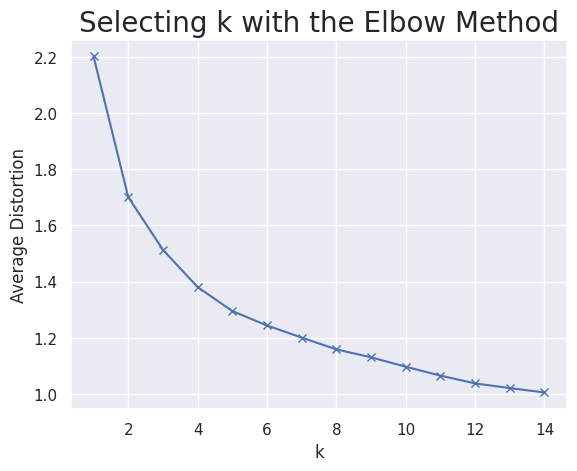

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k, random_state = 1)
    model.fit(data_pca)
    prediction = model.predict(k_means_df2)
    distortion = (
        sum(np.min(cdist(k_means_df2, model.cluster_centers_, "euclidean"), axis = 1))
        / k_means_df2.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize = 20)
plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters = 5, random_state = 1)
kmeans2.fit(k_means_df2)

KMeans(n_clusters=5, random_state=1)

In [ ]:
# Creating a copy of the original data
df2_cluster = data.copy()

# Adding K-Means cluster labels to the K-Means and original dataframes
k_means_df2["KM_segments"] = kmeans2.labels_
df2_cluster["KM_segments"] = kmeans2.labels_

In [ ]:
df2_cluster['Z_Sacrificio'] = df2_cluster['Z_Sacrificio'].astype(str)

In [ ]:
# Select only numeric columns for calculating the mean
numeric_cols = df2_cluster.select_dtypes(include=np.number).columns
km_cluster_profile2 = df2_cluster.groupby("KM_segments")[numeric_cols].mean()

In [ ]:
km_cluster_profile2["count_in_each_segment"] = (
    df2_cluster.groupby("KM_segments")["prom_lect8b_t_rbd"].count().values
)

Visualizacion de los valores máximos en cada columna que contiene el registro de los promedios (los que se encuentran en color verde), para facilitar la identificación de los patrones/tendencia por cluster. En este caso se identifica que el cluster 0 es el que posee el máximo promedio, y luego le siguen los cluster 2, 3, 4 y 1. En donde por cada cluster existen diferentes cantidades de acuerdo a esta característica. En el cluster 0 existen 555 establecimientos, para el cluster 1 existen 1059 establecimientos, para el cluster 2 existen 1077 establecimientos y finalmente para el 3 y 4 existen 705 y 1376 establecimientos respectivamente.

In [ ]:
km_cluster_profile2.style.highlight_max(color = "lightgreen", axis = 0)

,prom_lect8b_t_rbd,prom_mate8b_t_rbd,desv_lect8b_t_rbd,desv_mate8b_t_rbd,med_lect8b_t_rbd,med_mate8b_t_rbd,KM_segments,count_in_each_segment
KM_segments,,,,,,,,
0,284.978378,293.742703,17.760982,20.711122,283.070270,297.628829,0.000000,555
1,218.265534,222.403588,17.645758,15.836948,217.911237,223.059490,1.000000,1059
2,258.907892,263.329248,15.681498,15.413370,258.939647,264.177344,2.000000,1077
3,240.441986,242.948936,27.190043,25.089825,242.178723,242.878014,3.000000,705
4,237.427180,239.667006,14.173546,12.243309,237.551599,240.070494,4.000000,1376


Visualización de los nombres de los establecimientos por cluster.

In [ ]:
# Let's see the names of the players in each cluster
for cl in df2_cluster["KM_segments"].unique():
    print("In cluster {}, the following college are present:".format(cl))
    print(df2_cluster[df2_cluster["KM_segments"] == cl]["nom_rbd"].unique())
    print()

In cluster 1, the following college are present:
['LICEOPOLITECNICODEAYSEN' 'ESCUELAPEDROAGUIRRECERDA'
 'ESCUELABASICARURALELYECO' 'LICEOMUNICIPALSARATRONCOSOTRONCOSO'
 'ESCUELARALCOLEPOY' 'ESCUELAPARTICULARCANICU'
 'ESCUELAPART.TRAPATRAPABUTALELBUM' 'EDUCADORARTUROALVEARRAMOS'
 'COLEGIOREINADELDESIERTO' 'COLEGIOSIMONBOLIVAR' 'LICEOACADEMIASINAI'
 'COLEGIOMARAN-ATHA' 'COLEGIOMONTECARMELO' 'COLEGIOMARISTAHERMANOFERNANDO'
 'COLEGIONAZARET' 'COLEGIONIRVANA' 'ESCUELAPUDETO' 'COLEGIOSANPABLO'
 'COLEGIOMARÍASYLVESTERRASCH' 'ESCUELAJOSÉELÍASBOLIVARHERRERA'
 'ESCUELAREGIMIENTOHUSARES' 'LICEOMARTANAREADIAZ' 'ESCUELAESPANA'
 'ESCUELAREPUBLICADEITALIA' 'ESCUELAJOSEPAPICRADNIC'
 'ESCUELAPROFESORALJUBICADOMICWUTH' 'ESCUELAALCALDEMAXIMILIANOPOBLETE'
 'ESCUELAROMULOJ.PENAMATURANA' 'ESCUELACLAUDIOMATTEPEREZ'
 'ESCUELALASROCAS' 'ESCUELAGENERALMANUELBAQUEDANO'
 'ESCUELAFUNDACIONMINERAESCONDIDA' 'ESCUELASANTIAGOAMENGUALB.'
 'ESCUELAGABRIELAMISTRAL' 'COLSUNFLOWERSCHOOL'
 'REVERENDOPADREPATRICIOCARIOLA' 'E

Cantidad de establecimientos pertenecientes a las zonas de sacrificio por cluster.

In [ ]:
df2_cluster.groupby(["KM_segments", "Z_Sacrificio"])['nom_rbd'].count()

KM_segments  Z_Sacrificio
0            0                552
             1                  3
1            0               1046
             1                 13
2            0               1068
             1                  9
3            0                699
             1                  6
4            0               1354
             1                 22
Name: nom_rbd, dtype: int64

Boxplot por cluster de acuerdo a los diferentes atributos que contiene nuestra base de datos, lo importante es destacar lo que ocurre en base a los promedios.En los Cluster 1 y 4 se concentran los colegios con promedios más bajos en cuanto a las evaluaciones
de Lectura y Matemáticas. De los 53 colegios pertenecientes a zonas de sacrificio utilizados para este
análisis, aproximadamente el 66% de estos colegios se encuentran agrupados en éstos clúster.
Además, solamente 3 colegios pertenecen al grupo caracterizado por tener los promedios más altos.

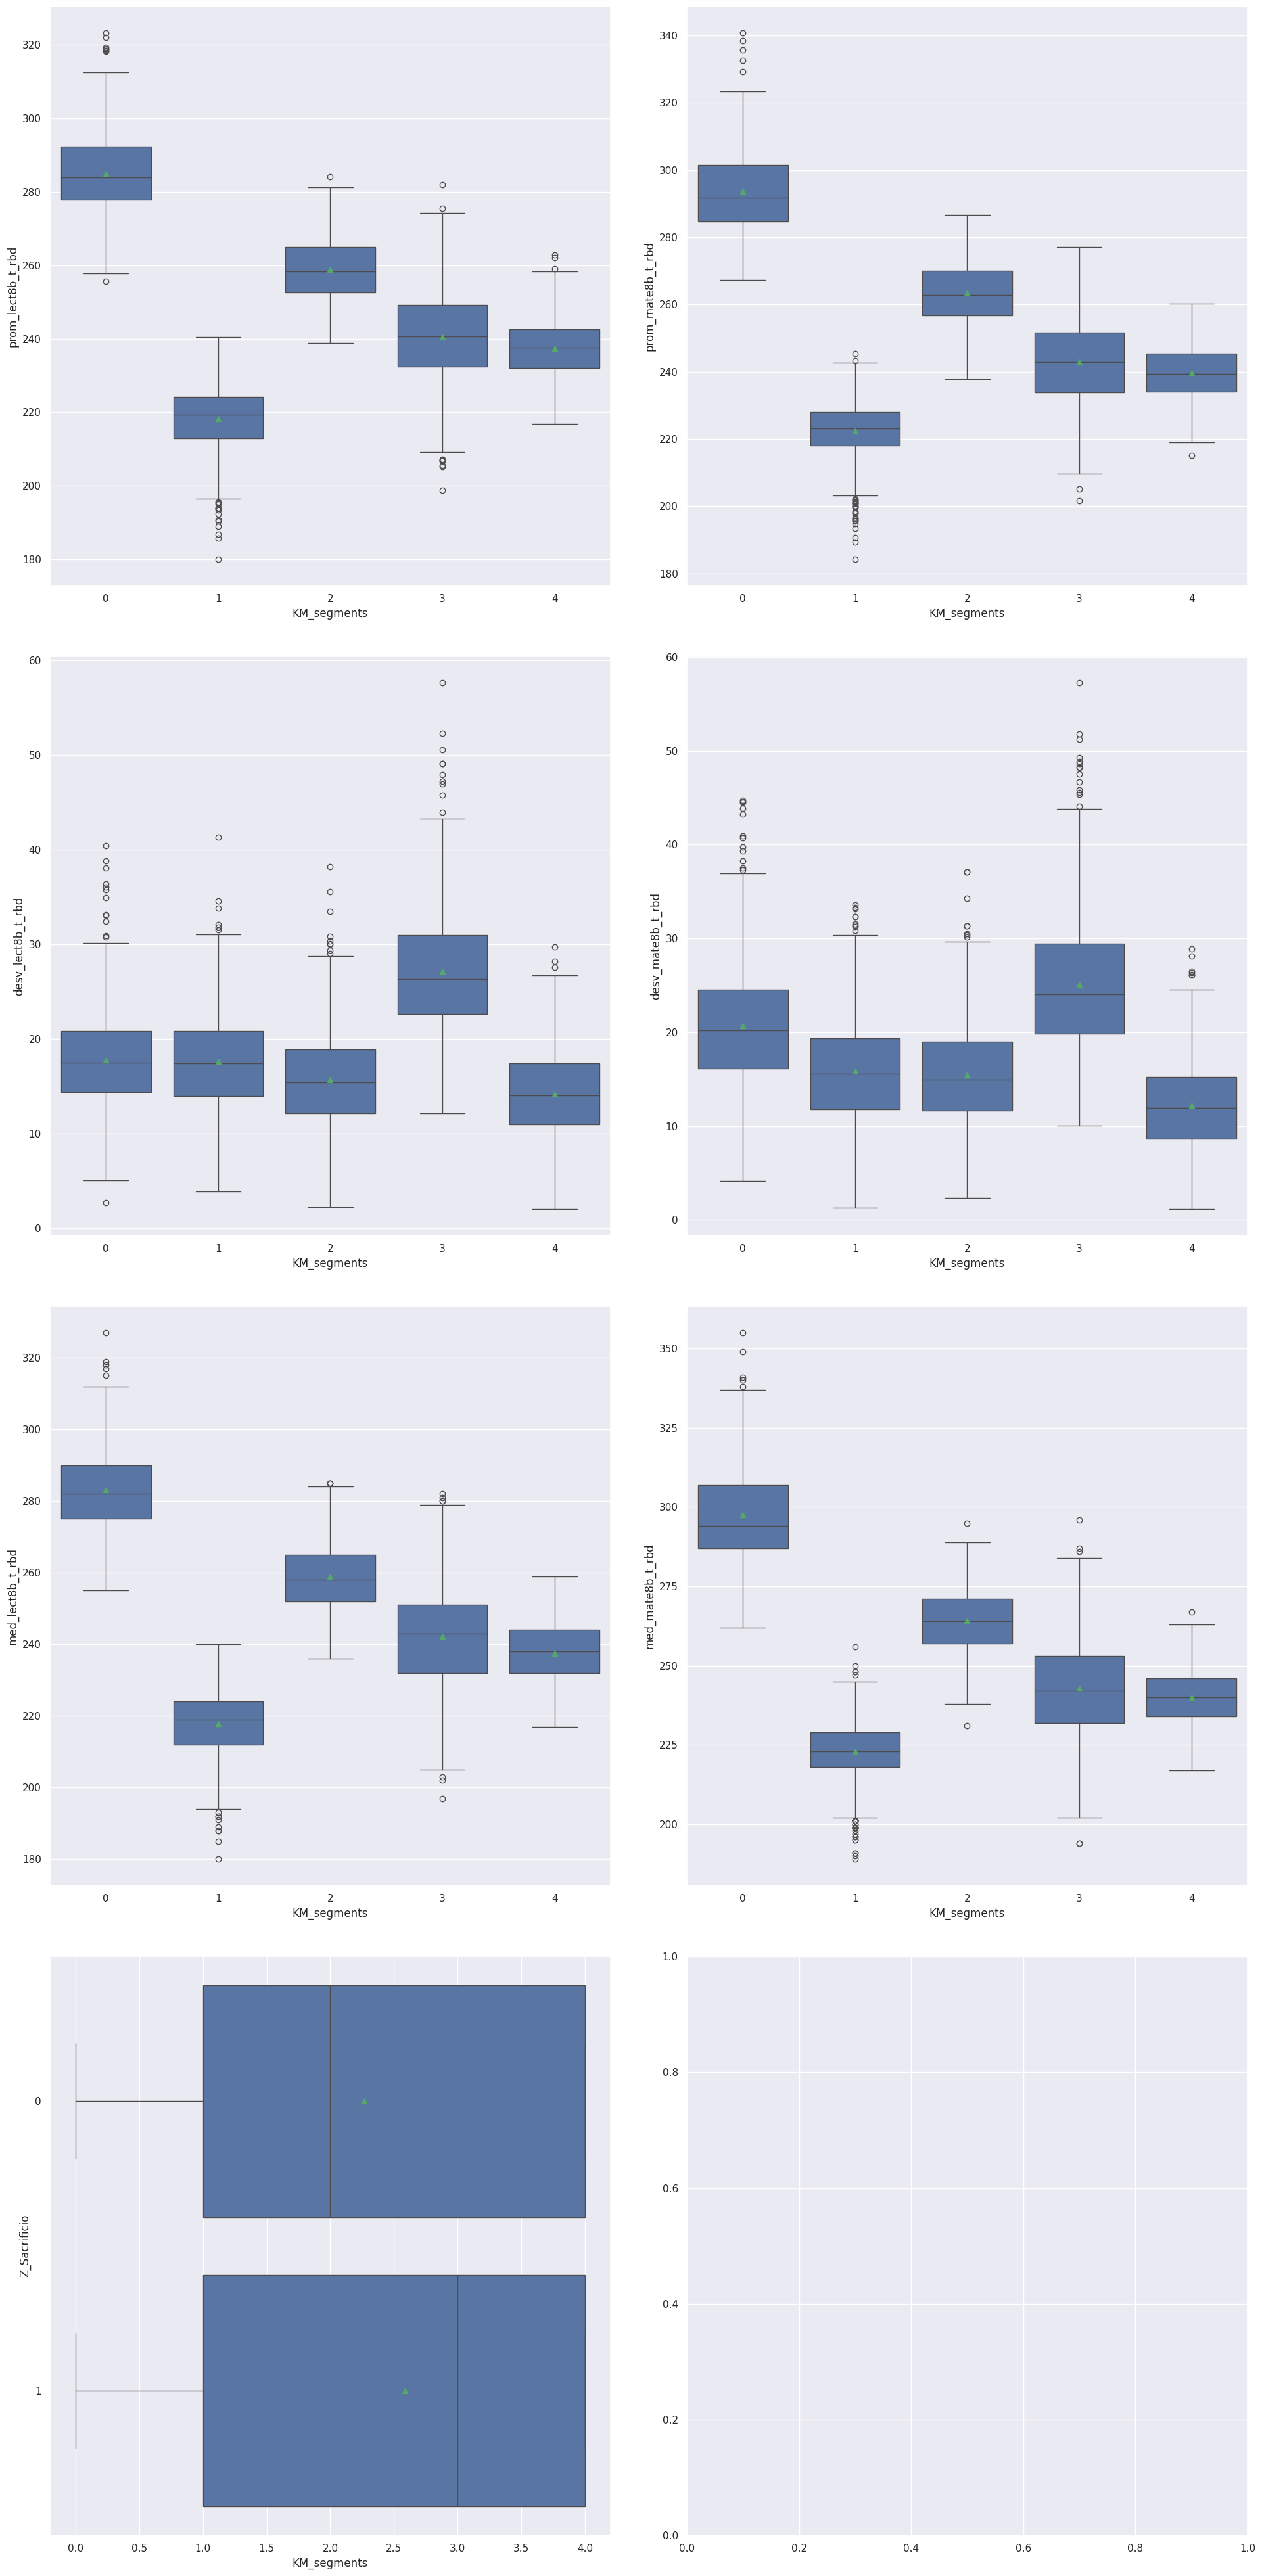

In [ ]:
fig, axes = plt.subplots(4, 2, figsize = (20, 40))
counter = 0

for ii in range(4):
    for jj in range(2):
        if counter < 7:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df2_cluster,
                y = df2_cluster.columns[2 + counter],
                x = "KM_segments", showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

Repetimos lo anterior, pero esta vez con un k=6. ¿Nos arrojará una mayor precisión o simplemente no existirá una diferencia significativa que caracterice aún más los cluster?

**CON 6 CLUSTERS**

In [ ]:
k_means_df3 = data_pca.copy()

Number of Clusters: 1 	Average Distortion: 2.2014108826281786
Number of Clusters: 2 	Average Distortion: 1.7008681900771256
Number of Clusters: 3 	Average Distortion: 1.5134088771982417
Number of Clusters: 4 	Average Distortion: 1.380626178329109
Number of Clusters: 5 	Average Distortion: 1.2952672661448528
Number of Clusters: 6 	Average Distortion: 1.2440571190158523
Number of Clusters: 7 	Average Distortion: 1.200820587696286
Number of Clusters: 8 	Average Distortion: 1.1588416310755076
Number of Clusters: 9 	Average Distortion: 1.1306243904898423
Number of Clusters: 10 	Average Distortion: 1.0972395797904977
Number of Clusters: 11 	Average Distortion: 1.065489263342108
Number of Clusters: 12 	Average Distortion: 1.0377538796514962
Number of Clusters: 13 	Average Distortion: 1.021116106275286
Number of Clusters: 14 	Average Distortion: 1.0055928776381398


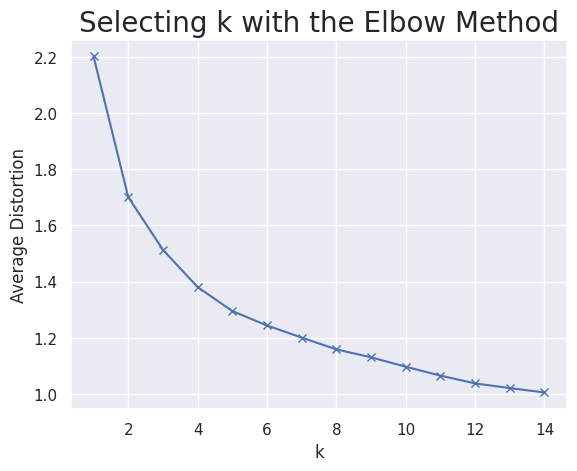

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k, random_state = 1)
    model.fit(data_pca)
    prediction = model.predict(k_means_df3)
    distortion = (
        sum(np.min(cdist(k_means_df3, model.cluster_centers_, "euclidean"), axis = 1))
        / k_means_df3.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize = 20)
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters = 6, random_state = 1)
kmeans3.fit(k_means_df3)

KMeans(n_clusters=6, random_state=1)

In [ ]:
# Creating a copy of the original data
df3_cluster = data.copy()

# Adding K-Means cluster labels to the K-Means and original dataframes
k_means_df3["KM_segments"] = kmeans3.labels_
df3_cluster["KM_segments"] = kmeans3.labels_

In [ ]:
df3_cluster['Z_Sacrificio'] = df3_cluster['Z_Sacrificio'].astype(str)

In [ ]:
# Select only numeric columns for calculating the mean
numeric_cols = df3_cluster.select_dtypes(include=np.number).columns
km_cluster_profile3 = df3_cluster.groupby("KM_segments")[numeric_cols].mean()

In [ ]:
km_cluster_profile3["count_in_each_segment"] = (
    df3_cluster.groupby("KM_segments")["prom_lect8b_t_rbd"].count().values
)

Visualizacion de los valores máximos en cada columna que contiene el registro de los promedios (los que se encuentran en color verde), para facilitar la identificación de los patrones/tendencia por cluster. En este caso se identifica que el cluster 0 es el que posee el máximo promedio, y luego le siguen los cluster 2, 3, 4, 5 y 1. En donde por cada cluster existen diferentes cantidades de acuerdo a esta característica. En el cluster 0 existen 498 establecimientos, para el cluster 1 existen 1091 establecimientos, para el cluster 2 existen 826 establecimientos y finalmente para el 3 existen 804 y para el cluster 4 y 5 existen 1376 establecimientos respectivamente.

In [ ]:
km_cluster_profile3.style.highlight_max(color = "lightgreen", axis = 0)

,prom_lect8b_t_rbd,prom_mate8b_t_rbd,desv_lect8b_t_rbd,desv_mate8b_t_rbd,med_lect8b_t_rbd,med_mate8b_t_rbd,KM_segments,count_in_each_segment
KM_segments,,,,,,,,
0,285.884337,295.106426,18.065165,21.530310,283.849398,299.253012,0.000000,498
1,219.059028,223.104125,17.644260,15.534830,218.729606,223.710357,1.000000,1091
2,262.403874,266.983777,14.474380,14.036125,262.117433,267.886199,2.000000,826
3,247.594030,251.334826,21.693801,20.243624,248.924129,252.201493,3.000000,804
4,237.329868,239.626898,13.239454,11.696228,237.415017,239.989274,4.000000,1212
5,233.262757,234.075660,30.541770,28.402301,234.530792,233.085044,5.000000,341


In [ ]:
# Let's see the names of the players in each cluster
for cl in df3_cluster["KM_segments"].unique():
    print("In cluster {}, the following college are present:".format(cl))
    print(df3_cluster[df3_cluster["KM_segments"] == cl]["nom_rbd"].unique())
    print()

In cluster 1, the following college are present:
['LICEOPOLITECNICODEAYSEN' 'ESCUELABASICARURALELYECO'
 'LICEOMUNICIPALSARATRONCOSOTRONCOSO' ... 'ESCUELASILVANOFERNANDEZ'
 'ESCUELAHÉROESDECHILE' 'LICEOCAMPANARIO']

In cluster 3, the following college are present:
['ESCUELABASICA' 'ESCUELAALMIRANTESIMPSON' 'ESCUELAPARTICULARSANJOSE'
 'COLEGIONUESTROTIEMPO' 'COLEGIOPUKALANDEALGARROBO' 'ESCUELAFRONTERIZA'
 'ESCUELARURALVILLACHACAO' 'ESCUELARURALELPALOMAR'
 'ESCUELARURALSENDACHACAO' 'LICEOBICENTENARIODEANCUD'
 'CENTROEDUCACIONALPAZYAMOR' 'ESCUELAPARTICULARALLAMAPU'
 'ESCUELAPARTICULARCOLONIADEGAÑ' 'ESCUELAPART.NUESTRASENORADELROSARIO'
 'ESCUELALASAMERICAS' 'COLEGIOPROVIDENCIA'
 'COLEGIOTECNICOINDUSTRIALDONBOSCO' 'COLEGIOSANPATRICIO' 'NORTHCOLLEGE'
 'ESCUELABASICACESARMONSALVEFLORES' 'ESCUELAEDELMIRAVERGARAQUIÑONES'
 'ESCUELAREPUBLICADEISRAEL' 'ESC.HUMBERTOVALENZUELAGARCIA'
 'LICEOAGRICOLAJOSEABELARDONUNEZM.' 'ESCUELAESPAÑA'
 'ESCUELAJORGEALESSANDRIRODRIGUEZ' 'COLEGIOSANJUANDELABLACHERE'
 '

Cantidad de establecimientos pertenecientes a las zonas de sacrificio por cluster.

In [ ]:
df3_cluster.groupby(["KM_segments", "Z_Sacrificio"])['nom_rbd'].count()

KM_segments  Z_Sacrificio
0            0                495
             1                  3
1            0               1077
             1                 14
2            0                820
             1                  6
3            0                797
             1                  7
4            0               1192
             1                 20
5            0                338
             1                  3
Name: nom_rbd, dtype: int64

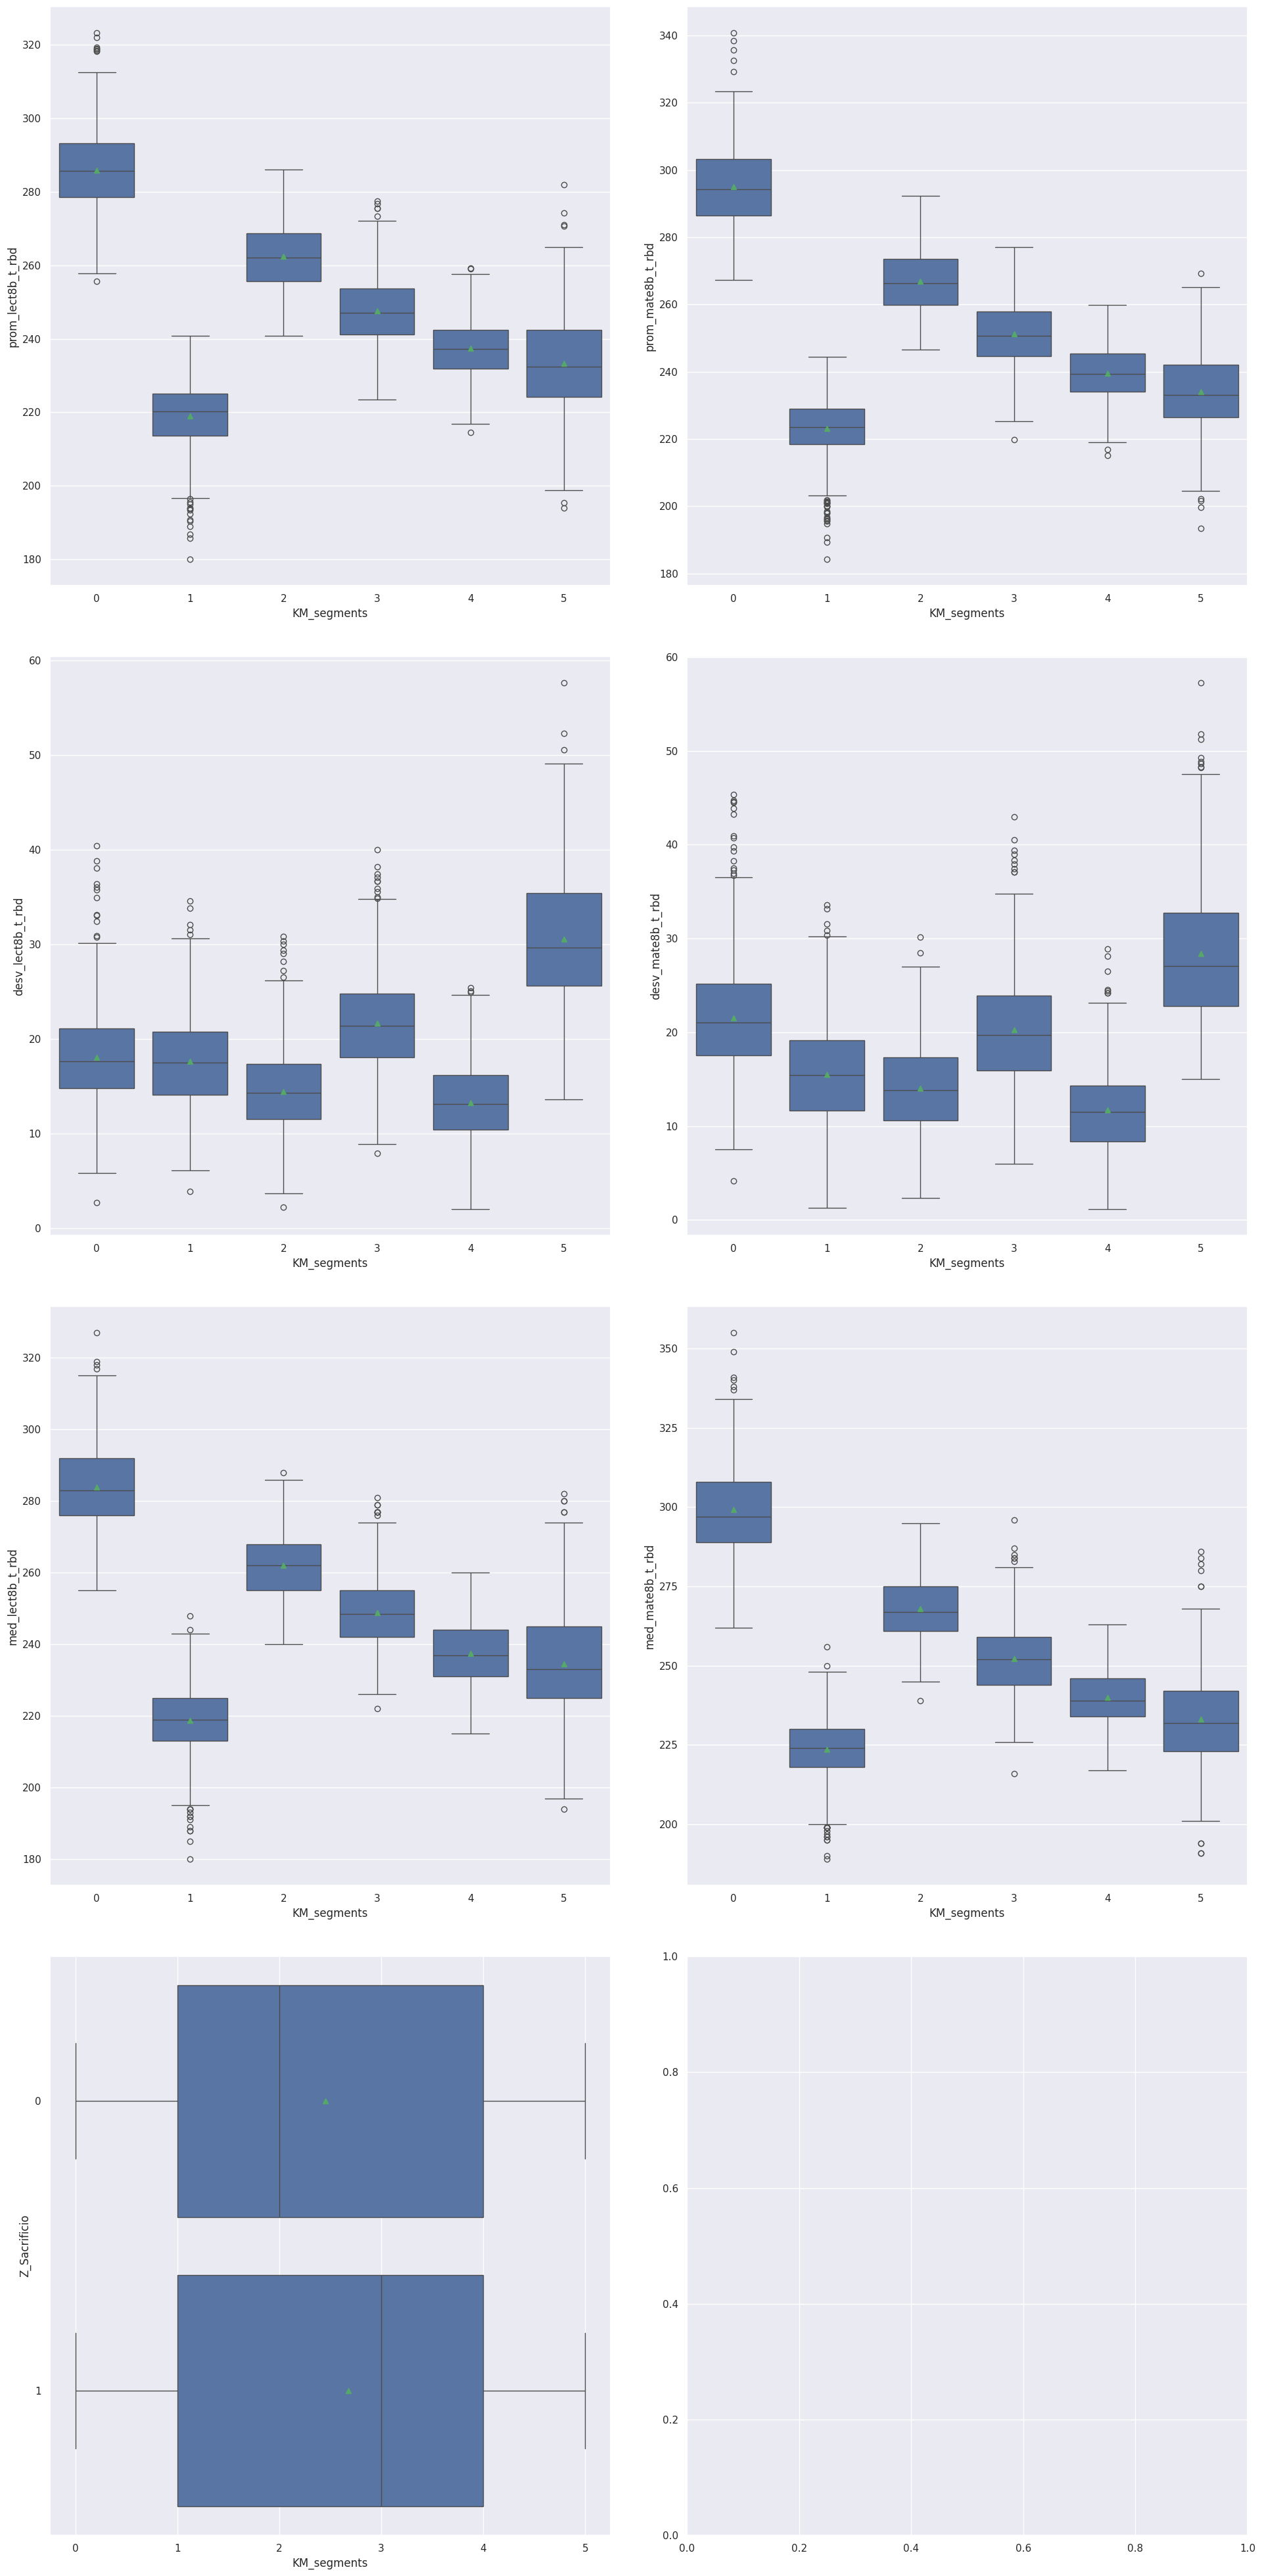

In [ ]:
fig, axes = plt.subplots(4, 2, figsize = (20, 40))
counter = 0

for ii in range(4):
    for jj in range(2):
        if counter < 7:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df3_cluster,
                y = df3_cluster.columns[2 + counter],
                x = "KM_segments", showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

Finalmente desacartamos la posibilidad de trabajar con k=6, dado que no existe una notoria diferencia entre cluster, los cluster 4 y 5, se encuentran cercanos entre sí, por lo que no es tan representativo uno del otro.


Con K=4

Tenemos que el Cluster 0 se caracteriza por:


1.   Contener los colegios que obtuvieron durante los años de estudio mayor promedio.
2.   Contener los outlier que toman valores más altos que cualquier otro cluster.
3.  Contener 783 colegios no pertenencientes a zonas de sacrificio y 3 si pertenecientes.

Tenemos que el Cluster 1 se caracteriza por:


1.   Contener los colegios que obtuvieron el promedio más bajos durante los años de estudio.
2.   Contener los outlier que toman los valores más bajos de acuerdo a los demás cluster.
3.  Contener 1689 colegios no pertenencientes a zonas de sacrificio y 25 si pertenecientes


Tenemos que el Cluster 2 se caracteriza por:

1.   Contener los colegios que obtuvieron un promedio que no se destacó ni por lo bajo ni por lo alto, aunque si tuvieramos que clasificarlo seria una tendencia a ser "medio".
2.   Contener 1526 colegios no pertenencientes a zonas de sacrificio y 19 si pertenecientes.

Tenemos que el Cluster 3 se caracteriza por:
1.  Contener los colegios que obtuvieron un promedio que no se destacó ni por lo bajo ni por lo alto, aunque si tuvieramos que clasificarlo seria una tendencia a ser "medio".
2.   Contener 721 colegios no pertenencientes a zonas de sacrificio y 6 si pertenecientes.

A partir de lo anterior es posible clasificar los cluster entre: promedios "altos", promedios "bajos" y promedios "medios". Lo que simplifica la visualizacion de la tendencia en base a los colegios pertenecientes a zonas de sacrificio y los cluster que los contienen, lo que permite describir preliminarmente que el 83% de los colegios que se encuentran en zonas de sacrificio corresponden a los cluster que que agrupa a los colegios con resultados 'bajos' y resultados 'medios'.

Con K=5

Tenemos que el Cluster 0 se caracteriza por:


1.   Contener los colegios que obtuvieron durante los años de estudio mayor promedio.
2.   Contener los outlier que toman valores más altos que cualquier otro cluster.
3.  Contener 552 colegios no pertenencientes a zonas de sacrificio y 3 si pertenecientes.

Tenemos que el Cluster 1 se caracteriza por:


1.   Contener los colegios que obtuvieron el promedio más bajos durante los años de estudio.
2.   Contener los outlier que toman los valores más bajos de acuerdo a los demás cluster.
3.  Contener 1046 colegios no pertenencientes a zonas de sacrificio y 13 si pertenecientes


Tenemos que el Cluster 2 se caracteriza por:

1.   Contener los colegios que obtuvieron un promedio que no se destacó ni por lo bajo ni por lo alto, aunque si tuvieramos que clasificarlo seria una tendencia a ser "medio".
2.   Contener 1068 colegios no pertenencientes a zonas de sacrificio y 9 si pertenecientes.

Tenemos que el Cluster 3 se caracteriza por:
1.  Contener los colegios que obtuvieron un promedio que no se destacó ni por lo bajo ni por lo alto, aunque si tuvieramos que clasificarlo seria una tendencia a ser "medio".
2.   Contener 699 colegios no pertenencientes a zonas de sacrificio y 6 si pertenecientes.

Tenemos que el Cluster 4 se caracteriza por:
1.  Contener los colegios que obtuvieron un promedio que no se destacó ni por lo bajo ni por lo alto, aunque si tuvieramos que clasificarlo seria una tendencia a ser "medio".
2.   Contener 1354 colegios no pertenencientes a zonas de sacrificio y 22 si pertenecientes.

Para este caso, es decir con k=5, se obtienen mayor similitud entre los cluster 3 y 4, los que corresponderían a grupos que representan las caracteristícas de establecimientos que obtuvieron rendimientos catalogados como "medios".
De lo anterior, se determinó finalmente trabajar con 4 cluster, dado la representatividad de los cluster en cuanto a sus caracteristicas que determinan y describen a este.

A partir de los resultados presentados, es posible definir una potencial correlación entre el índice de contaminación de las zonas
y el rendimiento académico de los estudiantes que allí estudian. Si bien, un bajo rendimiento
académico puede generarse a partir de distintos factores, la contaminación debe ser un factor relevante
a considerar al momento de investigar las causas de este. Por tal razón nos acercamos a una posible validación de la hipotesis, sin embargo seguimos en estudios que nos permitan recopilar mayor información de acuerdo a nuestro análisis.  